###¿Qué son las RNN?

Una red neuronal recurrente (RNN) es un modelo de aprendizaje profundo que está entrenado para procesar y convertir una entrada de datos secuencial en una salida de datos secuencial específica.

**Se distinguen por su "memoria", ya que toman información de entradas anteriores para utilizarse en los datos de entrada y en los resultados.**

Los datos secuenciales son datos, como palabras, oraciones o datos de serie temporal, en los que los componentes secuenciales se interaccionan en función de reglas semánticas y sintácticas complejas.

Una RNN es un sistema de software que consta de muchos componentes interconectados que imitan la forma en que los humanos realizan conversiones de datos secuenciales, como la traducción de texto de un idioma a otro.

Las RNN están siendo reemplazadas en gran medida por la inteligencia artificial (IA) basada en 'transformers' y modelos de lenguaje de gran tamaño (LLM), que son mucho más eficientes en el procesamiento secuencial de datos.

Si bien las redes neuronales profundas tradicionales asumen que los datos de entrada y los resultados son independientes entre sí, los resultados de las redes neuronales recurrentes depende de los elementos anteriores dentro de la secuencia. Aunque los eventos futuros también serían útiles para determinar los resultados de una secuencia dada, las redes neuronales recurrentes unidireccionales no pueden tener en cuenta estos eventos en sus predicciones.

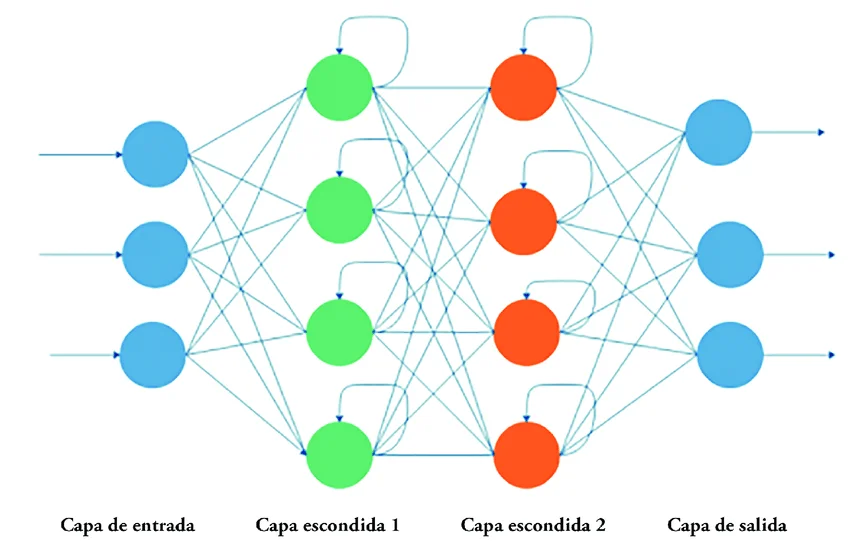




One-to-many


En primer lugar tenemos las Redes Neuronales Recurrentes “one to many” en donde la entrada es un único dato y la salida es una secuencia.

Un ejemplo de esta arquitectura es el “image captioning” en donde la entrada es una imagen y la salida es una secuencia de caracteres (un texto) que describe el contenido de la imagen:

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definimos el conjunto de caracteres y mapeos para el ejemplo
chars = "abcd"
char_to_idx = {ch: idx for idx, ch in enumerate(chars)}
idx_to_char = {idx: ch for idx, ch in enumerate(chars)}


input_size = len(chars)       # tamaño del vocabulario)
hidden_size = 16              # Tamaño del estado oculto
output_size = len(chars)      # (tamaño del vocabulario)
sequence_length = 5           # Longitud de la secuencia de salida deseada
learning_rate = 0.01          # Tasa de aprendizaje
num_epochs = 300              # Número de épocas de entrenamiento

# Red RNN Simple
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)
        return out, hidden

    def init_hidden(self):
        return torch.zeros(1, 1, self.hidden_size)

# Instanciamos el modelo, criterio de pérdida y optimizador
model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Entrenamiento
for epoch in range(num_epochs):
    hidden = model.init_hidden()
    input_char = torch.tensor([[char_to_idx["a"]]], dtype=torch.long)  # Caracter de entrada 'a'
    loss = 0

    for t in range(sequence_length):
        output, hidden = model(input_char, hidden)

        # Target es el siguiente carácter esperado en la secuencia
        target_char = (char_to_idx["a"] + t + 1) % len(chars)  # Genera una secuencia cíclica de "abcd"
        target = torch.tensor([target_char], dtype=torch.long)

        # Calcula la pérdida
        loss += criterion(output.view(-1, output_size), target)

        # El siguiente input será el carácter generado por el modelo
        _, predicted_idx = torch.max(output, 2)
        input_char = predicted_idx

    # Backpropagation y optimización
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Generación de secuencia de texto
def generate_sequence(model, start_char, length):
    model.eval()
    chars = [start_char]
    input_char = torch.tensor([[char_to_idx[start_char]]], dtype=torch.long)
    hidden = model.init_hidden()

    for _ in range(length):
        with torch.no_grad():
            output, hidden = model(input_char, hidden)
            _, predicted_idx = torch.max(output, 2)
            next_char = idx_to_char[predicted_idx.item()]
            chars.append(next_char)
            input_char = predicted_idx

    return ''.join(chars)

# Prueba de generación de secuencia a partir del carácter 'a'
start_char = "b"
generated_sequence = generate_sequence(model, start_char, length=10)
print("Secuencia generada:", generated_sequence)


Epoch [50/300], Loss: 0.0468
Epoch [100/300], Loss: 0.0186
Epoch [150/300], Loss: 0.0117
Epoch [200/300], Loss: 0.0082
Epoch [250/300], Loss: 0.0061
Epoch [300/300], Loss: 0.0048
Secuencia generada: bcdabcdabcd


La red consta de una capa de embedding para convertir los caracteres en vectores, una capa RNN y una capa lineal que genera la salida final. La salida es una secuencia de caracteres basados en la entrada inicial.

Many-to-many

También existe la arquitectura “many to many” en donde tanto a la entrada como a la salida se tienen secuencias.

Un ejemplo de este tipo de red recurrente son los traductores automáticos. En este caso la secuencia de salida no se genera al mismo tiempo que la secuencia de entrada, pues para poder traducir, por ejemplo, una frase del Inglés al Español se requiere primero conocer la totalidad del texto en Inglés:

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definimos el conjunto de caracteres y mapeos para el ejemplo
chars = "abcdefghijklmnopqrstuvwxyz"
char_to_idx = {ch: idx for idx, ch in enumerate(chars)}
idx_to_char = {idx: ch for idx, ch in enumerate(chars)}

# Parámetros de la red
input_size = len(chars)
hidden_size =
output_size = len(chars)
sequence_length = 4
learning_rate = 0.01
num_epochs = 300

# Red RNN Simple Many-to-Many
class ManyToManyRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ManyToManyRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        x = self.embedding(x)  # Convierte la entrada en embeddings
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)     # Pasa el estado oculto por la capa de salida
        return out, hidden

    def init_hidden(self):
        return torch.zeros(1, 1, self.hidden_size)

# Instanciamos el modelo, criterio de pérdida y optimizador
model = ManyToManyRNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Entrenamiento
for epoch in range(num_epochs):
    hidden =
    input_seq =
    target_seq =
    loss = 0

    # Procesamiento de toda la secuencia de entrada en cada época
    output, hidden = model(XXX)
    output = output.view(-1, output_size)  # Ajusta para CrossEntropyLoss
    target_seq = target_seq.view(-1)       # Ajusta para CrossEntropyLoss

    # Calcula la pérdida

    # Backpropagation y optimización


    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Generación de secuencia de salida a partir de una secuencia de entrada
def generate_sequence(model, start_seq):
    model.eval()
    input_seq = torch.tensor([[char_to_idx[ch] for ch in start_seq]], dtype=torch.long)
    hidden = model.init_hidden()

    with torch.no_grad():
        output, hidden = model(input_seq, hidden)
        predicted_idxs = output.argmax(dim=2).squeeze().tolist()
        return ''.join([idx_to_char[idx] for idx in predicted_idxs])

# Prueba de generación de secuencia con una entrada "abcd"
start_seq = "jlks"
generated_sequence = generate_sequence(model, start_seq)
print("Secuencia de entrada:", start_seq)
print("Secuencia generada:", generated_sequence)


Epoch [50/300], Loss: 0.0223
Epoch [100/300], Loss: 0.0095
Epoch [150/300], Loss: 0.0060
Epoch [200/300], Loss: 0.0042
Epoch [250/300], Loss: 0.0031
Epoch [300/300], Loss: 0.0024
Secuencia de entrada: jlks
Secuencia generada: zyzy


Many-to-one

Una segunda arquitectura son las Redes Neuronales Recurrentes “many to one”, en donde la entrada es una secuencia y la salida es por ejemplo una categoría.

Un ejemplo de esto es la clasificación de sentimientos en donde por ejemplo la entrada es un texto que contiene una crítica a una película y la salida es una categoría indicando si la película le gusto al crítico o no:

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definimos el conjunto de caracteres y mapeos para el ejemplo
chars = "abcdefghijklmnopqrstuvwxyz "
char_to_idx = {ch: idx for idx, ch in enumerate(chars)}
idx_to_char = {idx: ch for idx, ch in enumerate(chars)}

# Parámetros de la red
input_size = len(chars)
hidden_size = 16
output_size = 2
sequence_length = 5
learning_rate = 0.01
num_epochs = 300


class ManyToOneRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ManyToOneRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        x = self.embedding(x)  # Convierte la entrada en embeddings
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out[:, -1, :])  # Usa solo el último estado oculto
        return out

    def init_hidden(self):
        return torch.zeros(1, 1, self.hidden_size)

# Instanciamos el modelo, criterio de pérdida y optimizador
model =
criterion =
optimizer =

# Datos de entrenamiento
train_data = [("hello", 1), ("bueno", 1), ("malo", 0), ("sad", 0), ("happy", 1)]
for epoch in range(num_epochs):
    for seq, label in train_data:
        hidden = model.init_hidden()
        input_seq =
        target = torch.tensor([label], dtype=torch.long)

        # Forward pass


        # Calcula la pérdida


        # Backpropagation y optimización


    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Función para clasificar nueva secuencia
def classify_sequence(model, seq):
    model.eval()
    input_seq = torch.tensor([[char_to_idx[ch] for ch in seq]], dtype=torch.long)
    hidden = model.init_hidden()

    with torch.no_grad():
        output = model(input_seq, hidden)
        _, predicted = torch.max(output, 1)
        return "Positivo" if predicted.item() == 1 else "Negativo"

# Prueba de clasificación
test_seq = "hello"
result = classify_sequence(model, test_seq)
print(f"La secuencia '{test_seq}' es: {result}")

test_seq = "malo"
result = classify_sequence(model, test_seq)
print(f"La secuencia '{test_seq}' es: {result}")


SyntaxError: invalid syntax (<ipython-input-16-cf8e6ab0329d>, line 37)